## TSML-13 HW1 Знакомство с временными рядами

In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

In [42]:
sales_of_company_x = pd.read_csv("data/HW1/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("data/HW1/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("data/HW1/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("data/HW1/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("data/HW1/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("data/HW1/daily-total-female-births-in-cal.csv")

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
all_series = {
    "Monthly sales of company X (jan 6)": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

## Выведем сначала графики всех временных рядов

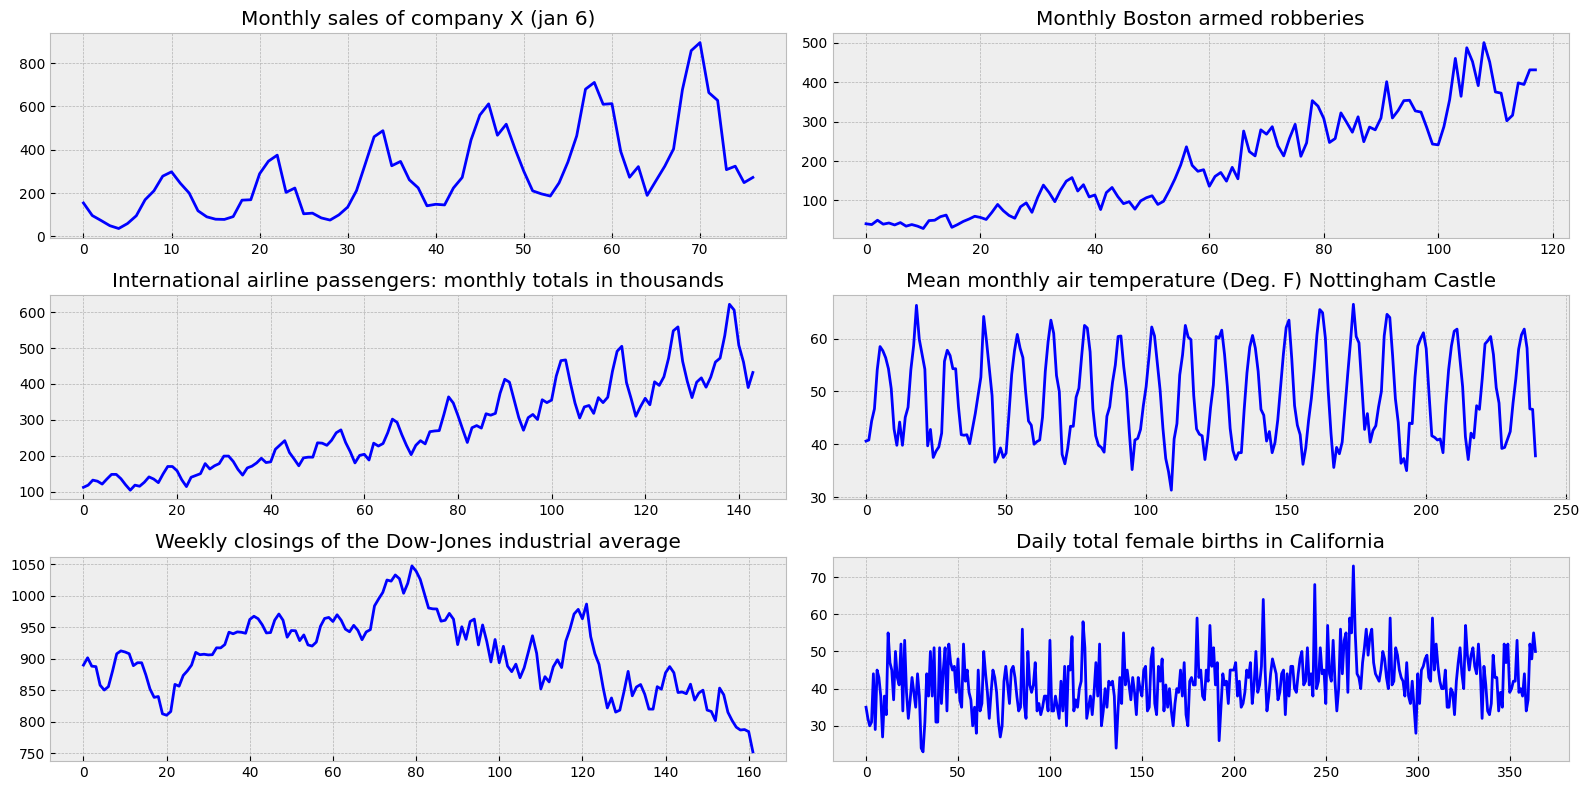

In [46]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

## Зададим функцию вывода коррелограмм

In [47]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## Зададим функцию для проведения теста Дики-Фуллера

In [48]:
def test_stationarity(timeseries):
    ################
    # Дики-Фуллер
    ##################
    print('Результат по тесту Дики-Фуллера:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

## 1. "Monthly sales of company X"

In [49]:
test_stationarity(all_series["Monthly sales of company X (jan 6)"])

Результат по тесту Дики-Фуллера:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


P-Value > 0.05, т.е. ряд нестационарен. Другими словами, тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда.

 #### Коррелограмма

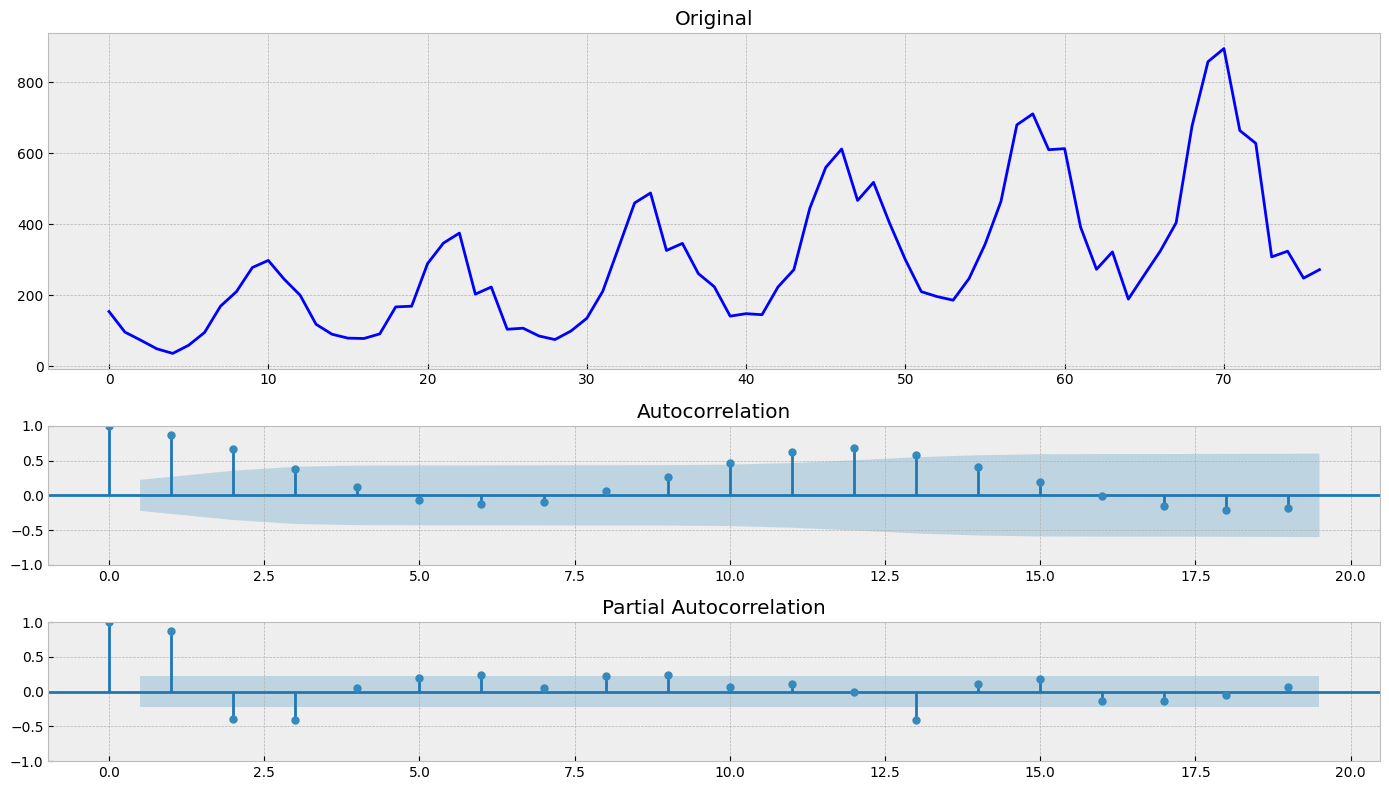

In [50]:
tsplot(all_series["Monthly sales of company X (jan 6)"])

 #### Из коррелограммы можно сделать вывод, что присутствуют сезонность и тренд, т.е. ряд нестационарен. Для приведения к стационарному виду сначала попробуем нормализовать при помощи преобразования Бокса-Кокса.

In [51]:
series = boxcox(all_series["Monthly sales of company X (jan 6)"], 0)

In [53]:
test_stationarity(series)

Результат по тесту Дики-Фуллера:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


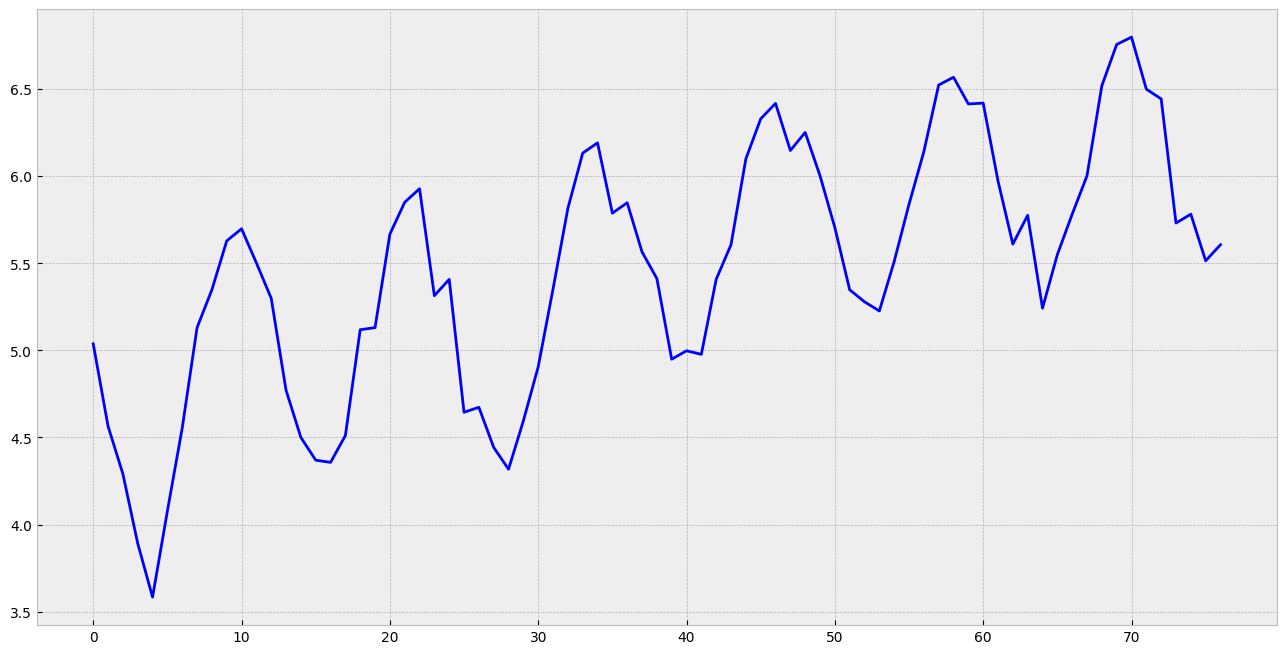

In [55]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

#### P-Value всё равно больше 0.05, да и тренд с сезонностью остались. Поэтому применяем дифференцирование.

In [56]:
series = np.diff(series, 1)

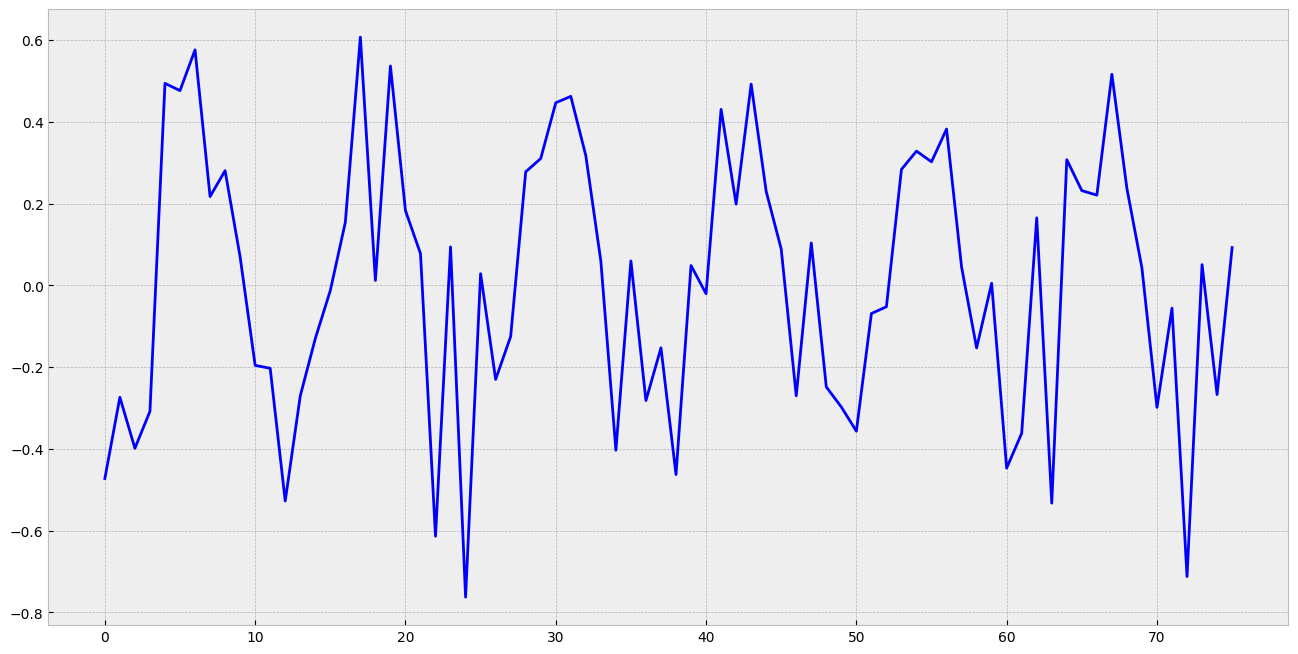

In [57]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

In [58]:
test_stationarity(series)

Результат по тесту Дики-Фуллера:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


#### Значение P-value снизилось до 0.02, из графика ушел тренд и практически ушла сезонность. Можно сделать вывод, что ряд стал стационарным. 

## 2. "Monthly Boston armed robberies"

In [60]:
test_stationarity(all_series["Monthly Boston armed robberies"])

Результат по тесту Дики-Фуллера:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


P-Value > 0.05, т.е. ряд нестационарен.

 #### Коррелограмма

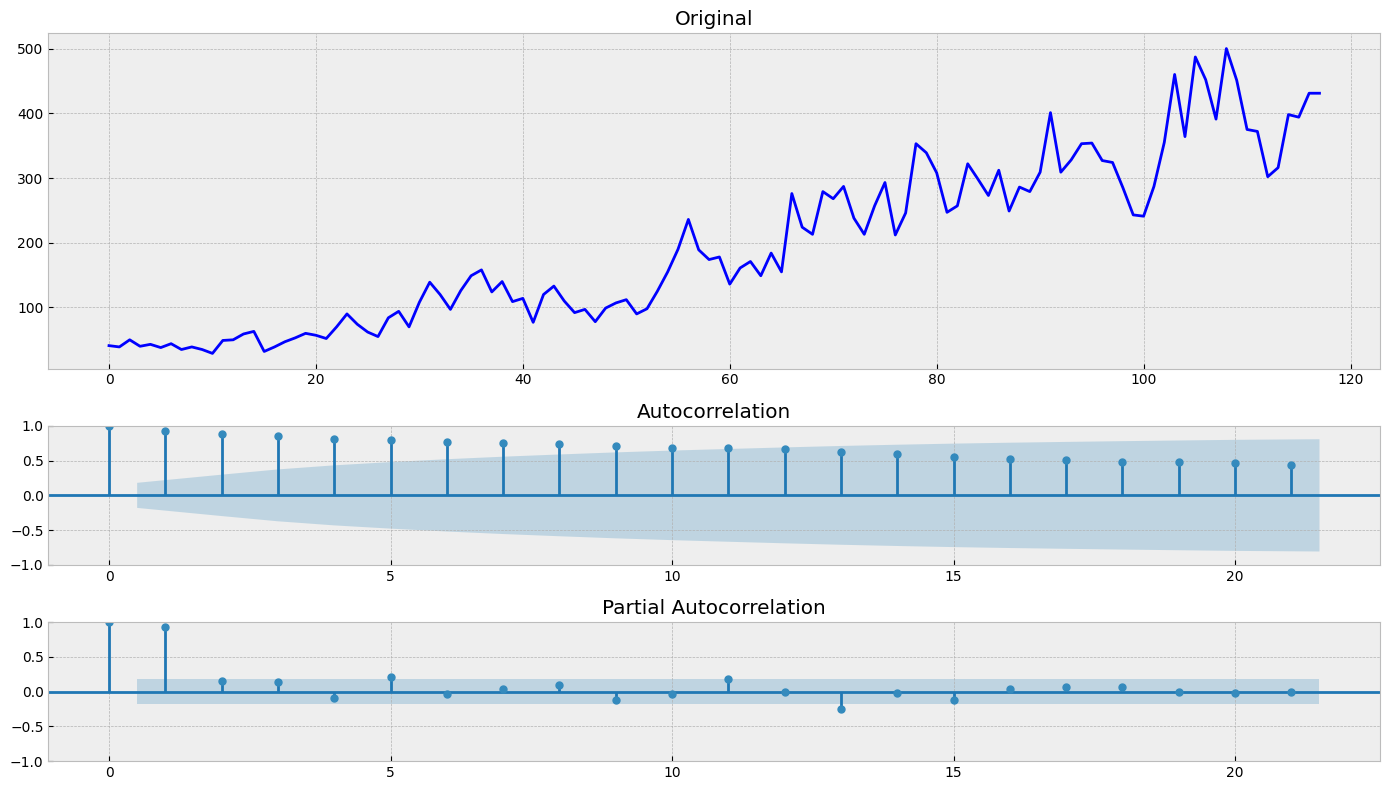

In [61]:
tsplot(all_series["Monthly Boston armed robberies"])

#### Наблюдается тренд
#### Сезонности не видно
#### Попробуем дифференцирование.

In [62]:
series = np.diff(all_series["Monthly Boston armed robberies"], 1)

In [63]:
test_stationarity(series)

Результат по тесту Дики-Фуллера:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


 #### Коррелограмма

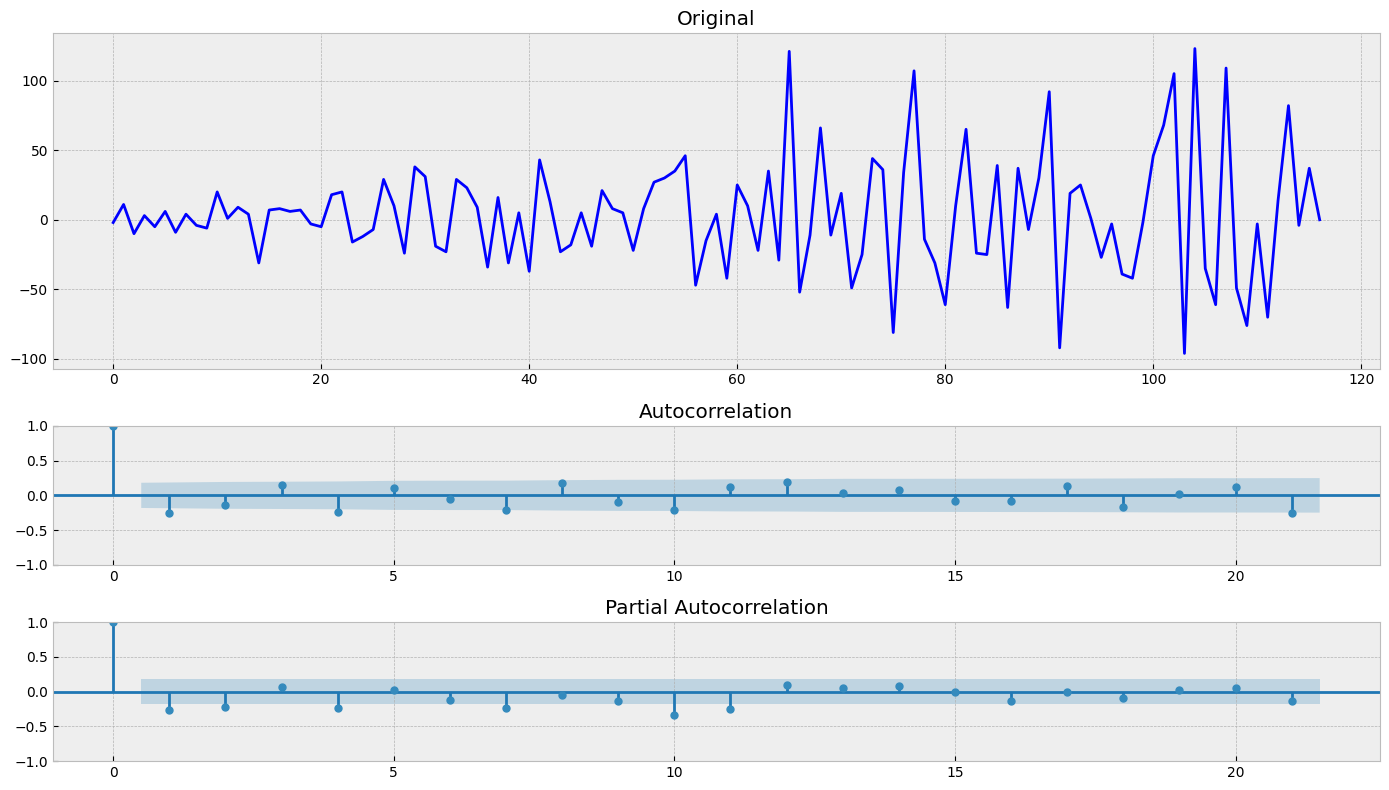

In [64]:
tsplot(series)

#### P-value близко к нулю, тренд и сезонность ушли. Ряд стал стационарным.

## 3. "International airline passengers: monthly totals in thousands"

In [77]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Результат по тесту Дики-Фуллера:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


 #### Коррелограмма

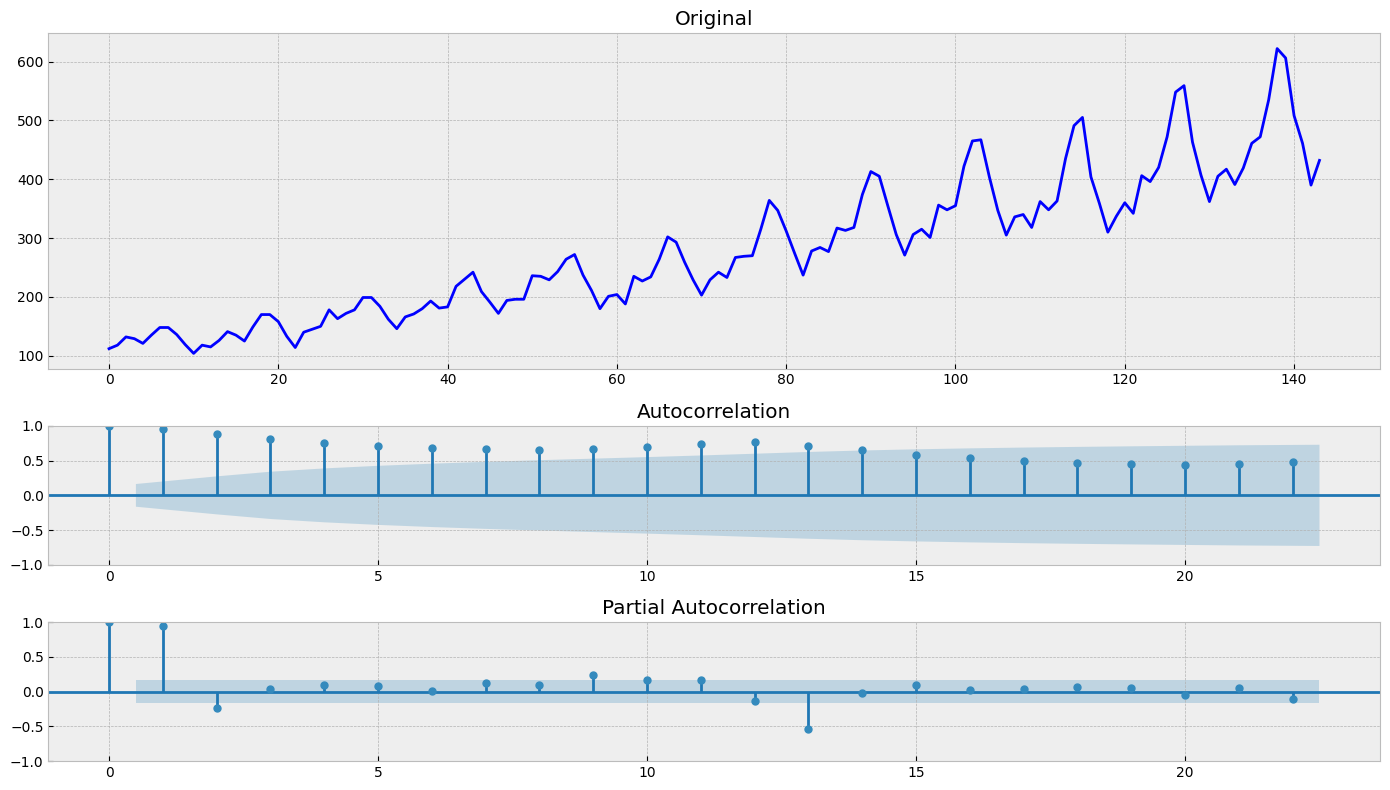

In [78]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])

#### Мы видим, что p-value больше 0.05
#### Присутствуют тренд и сезонность -> ряд нестационарен. 
#### Попробуем применить преобразование Бокса-Кокса.

In [67]:
series = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

In [79]:
test_stationarity(series)

Результат по тесту Дики-Фуллера:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


#### Преобразование Бокса-Кокса не сработало
#### p-value осталось значительно больше 0.05. 
#### Попробуем дифференцирование с лагом 12, чтобы убрать сезонность.

In [80]:
series = series[12:] - series[:-12]

In [70]:
test_stationarity(series)

Результат по тесту Дики-Фуллера:
Test Statistic                  -2.709577
p-value                          0.072396
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


#### Дифференцирование помогло, но не до конца, т.к. p-value осталось больше 0.05 -> 0.07
#### Пробуем ещё раз продифференцировать с лагом 1

In [71]:
series = series[1:] - series[:-1]

In [73]:
test_stationarity(series)

Результат по тесту Дики-Фуллера:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


 #### Коррелограмма

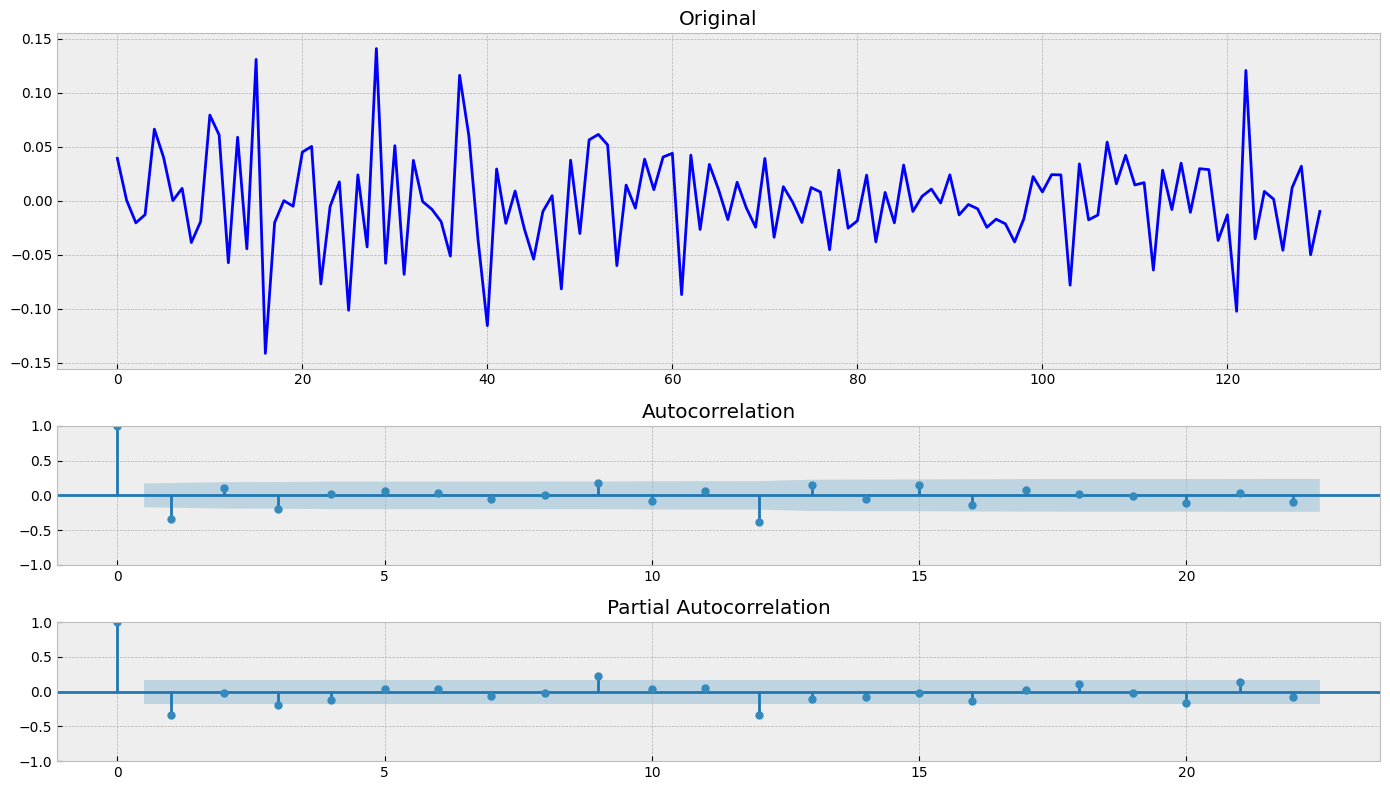

In [75]:
tsplot(series)

#### Мы видим, что тренд и сезонность ушли, p-value близко к нулю. Ряд стал стационарным.

## 4. "Mean monthly air temperature (Deg. F) Nottingham Castle"

In [130]:
test_stationarity(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Результат по тесту Дики-Фуллера:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


 #### Коррелограмма

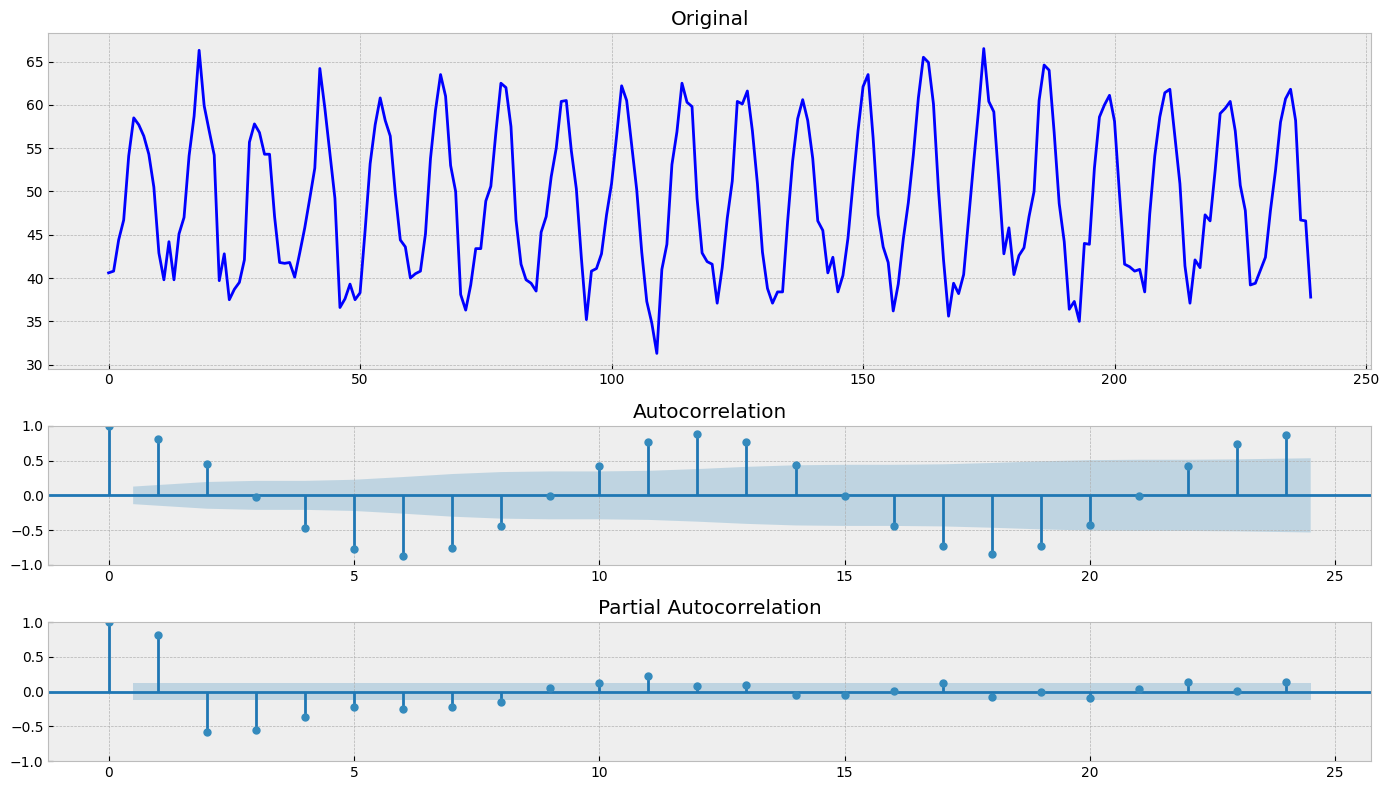

In [131]:
tsplot(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

#### p-value меньше 0.05, 
#### Ряд стационарный

## 5. "Weekly closings of the Dow-Jones industrial average"

In [193]:
test_stationarity(all_series["Weekly closings of the Dow-Jones industrial average"])

Результат по тесту Дики-Фуллера:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


 #### Коррелограмма

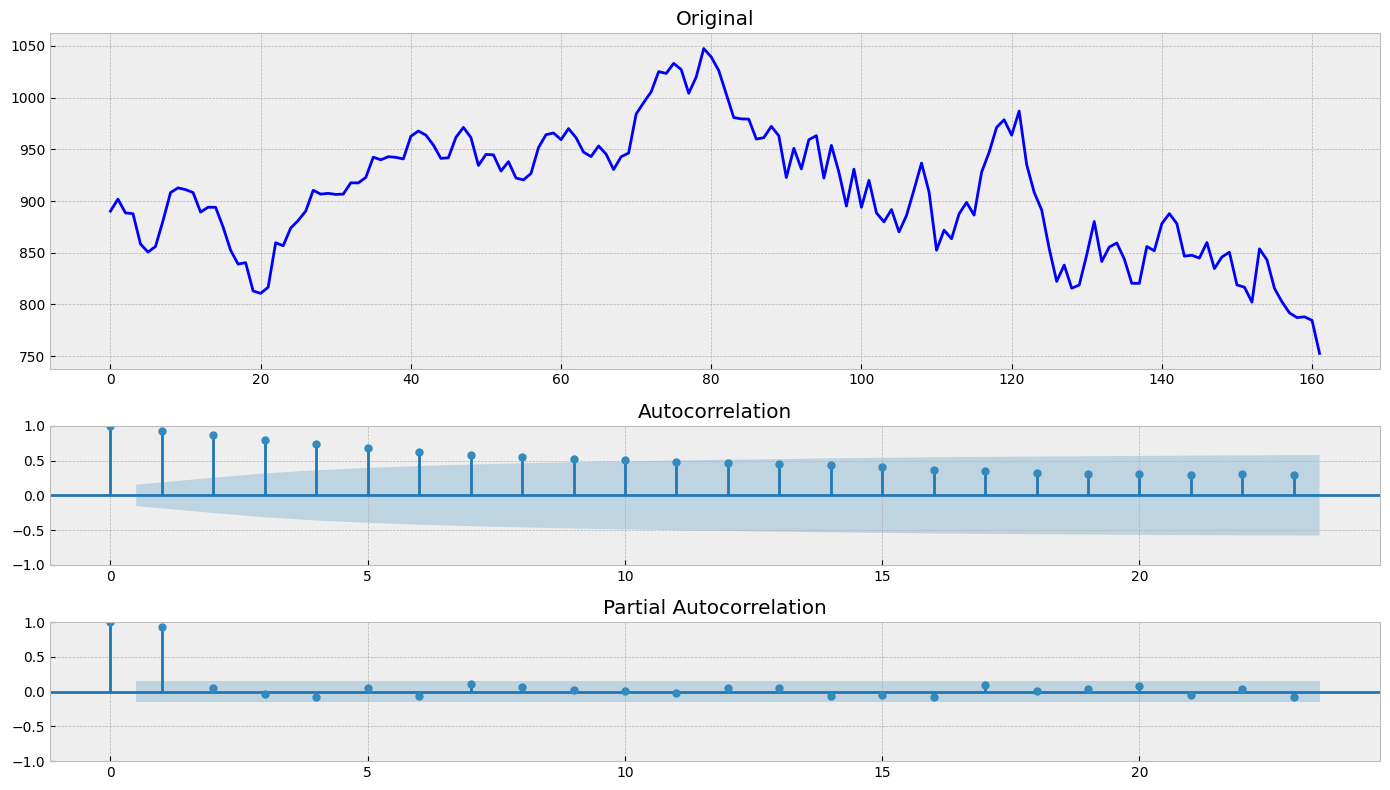

In [187]:
tsplot(all_series["Weekly closings of the Dow-Jones industrial average"])

#### Есть тренды
#### Сезонности не наблюдается. 
#### P-value больше 0.05, ряд нестационарен
#### Применим дифференцирование

In [194]:
# series = np.diff(all_series["Weekly closings of the Dow-Jones industrial average"], 1)
series = series[12:] - series[:-12]
series = series[10:] - series[:-10]

In [195]:
test_stationarity(series)

Результат по тесту Дики-Фуллера:
Test Statistic                 -5.559970
p-value                         0.000002
#Lags Used                     10.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


#### Коррелограмма

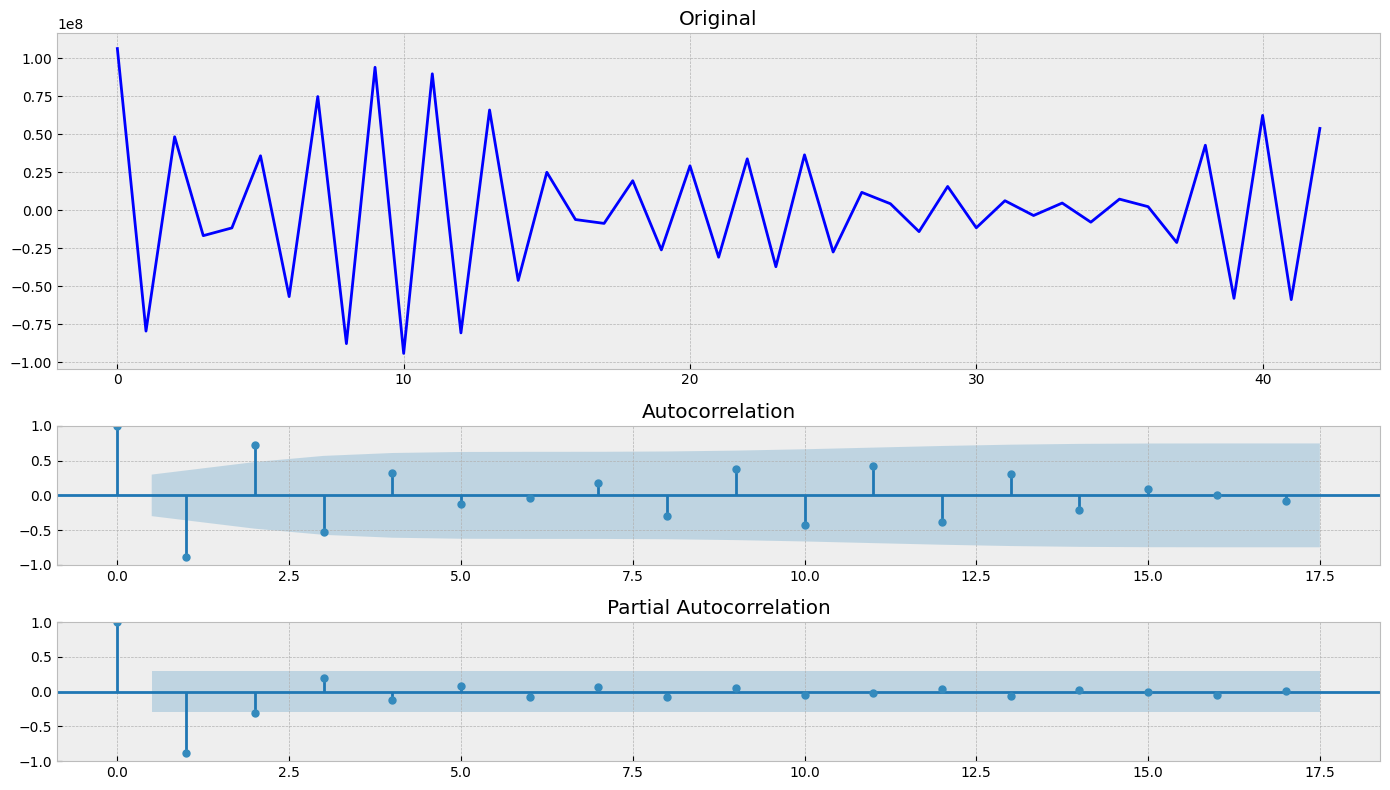

In [196]:
tsplot(series)

#### P-value снизилось почти до нуля
#### Тренды ушли
#### Ряд стал стационарным

## 6. "Daily total female births in California"

In [162]:
test_stationarity(all_series["Daily total female births in California"])

Результат по тесту Дики-Фуллера:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


#### Коррелограмма

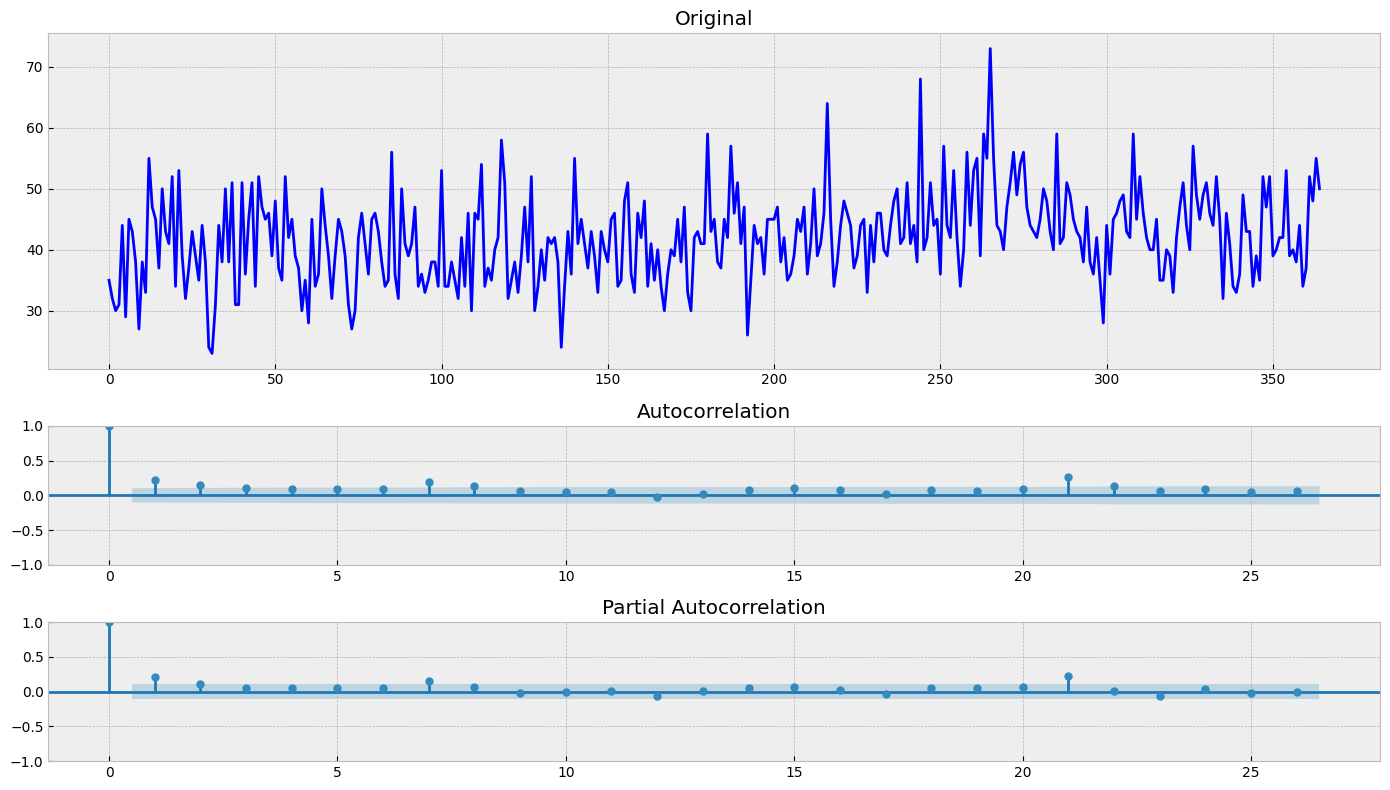

In [163]:
tsplot(all_series["Daily total female births in California"])

#### p-value близко к нулю
#### тренды и сезонность не прослеживаются
#### Ряд стационарный.